In [8]:
import pandas as pd
from IPython.display import display
df = pd.read_csv(r'C:\Users\Anthony\JupyterProjects\retail_sales_project\data\retail_sales_dataset.csv')

# // Which Category Generated the Most Revenue? //

# Total Revenue by Category
product_category = df.groupby('Product Category')

category_df = product_category['Total Amount'].sum().reset_index()
total_revenue_by_category_df = category_df.sort_values(by = 'Total Amount', ascending = False)

total_revenue_by_category_styler = total_revenue_by_category_df.style.set_caption('Total Revenue by Category')

total_revenue_by_category_styler

# ANSWER: 'Electronics' generated the most revenue, 
#         'CLothing' had the second most, and
#         'Beauty' generated the least revenue.
#          Electronics generates the most revenue, 
#          suggesting it should remain a priority 
#          category for inventory and promotions.

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


C:\Users\Anthony\AppData\Local\Temp\ipykernel_17720\3963907312.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_to_spending_df = df.groupby('Age Group')['Total Amount'].mean().reset_index()


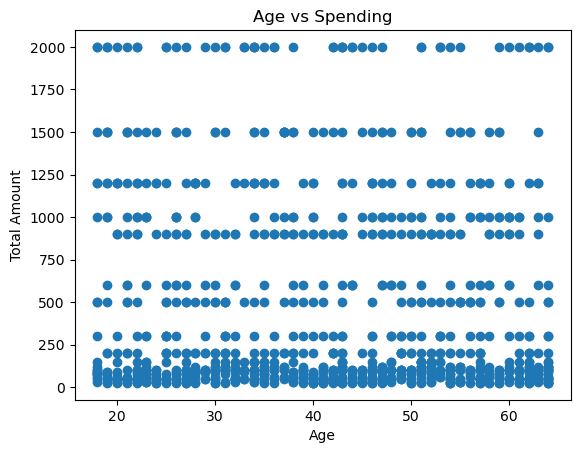

,Age,Total Amount
Age,1.000000,-0.060568
Total Amount,-0.060568,1.000000


,Age Group,Total Amount
0,18–24,501.006711
1,25–34,478.275862
2,35–44,467.801932
3,45–54,432.155556
4,55–64,417.546296



Correlation Coeficient =  -0.060568



In [9]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Anthony\JupyterProjects\retail_sales_project\data\retail_sales_dataset.csv')

# // Does Age relate to spending? //

# Visualized Correlation (Shows lack of trend in the scatter plot)
def age_to_spending_scatterplot():
    plt.scatter(df['Age'], df['Total Amount'])
    plt.xlabel('Age')
    plt.ylabel('Total Amount')
    plt.title('Age vs Spending')
    return plt.show()

# Correlation Coefficient: -0.060568 // Weak Negative Correlation (less than 1%)
age_to_spending_correlation = df[['Age', 'Total Amount']].corr()
age_to_spending_correlation_styler = age_to_spending_correlation.style.set_caption('Age to Spending Correlation Table')

# DataFrame of Age related Spending in Segments
bins = [18, 25, 35, 45, 55, 65]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64']
df['Age Group'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)

age_to_spending_df = df.groupby('Age Group')['Total Amount'].mean().reset_index()
age_to_spending_df_styler = age_to_spending_df.style.set_caption('Average Spending by Age Group')

def data_display(): 
    #Scatter Plot
    age_to_spending_scatterplot()
    
    print('')
    display(age_to_spending_correlation_styler)
    
    print('')
    display(age_to_spending_df_styler)

    print('\nCorrelation Coeficient =  -0.060568\n')


data_display()



# ANSWER: This analysis examines spending per transaction, not lifetime customer value.
#         Average spending per purchase decreases slightly with age, as shown by age group averages. 
#         However, the overall correlation between age and spending is very weak (r = -0.060568), 
#         indicating that age is not a strong predictor of customer spending.

In [10]:
import pandas as pd
from IPython.display import display

df = pd.read_csv(r'C:\Users\Anthony\JupyterProjects\retail_sales_project\data\retail_sales_dataset.csv')

# // Are There Gender-Based Purchasing Differences? //

# Gender_Based Purchases (Frequency)
gender_to_product_df = (df.groupby(['Product Category', 'Gender']).size().unstack(fill_value=0))
gender_to_product_styler = gender_to_product_df.style.set_caption('Gender Based Purchases by Frequency')


# Gender-Based Purchases (Average Spending)
gender_spending_df = (df.groupby(['Product Category', 'Gender'])['Total Amount'].mean().unstack())
gender_spending_styler = gender_spending_df.style.set_caption('Average Spending by Gender and Category')

# Overall Gender-Based Purchases (Average Spending)
overall_gender_spending_df = df.groupby('Gender')['Total Amount'].mean().reset_index()
overall_gender_spending_styler = overall_gender_spending_df.style.set_caption('Overall Average Gender-Based Purchases')

# Data Display
def data_display():
    display(gender_to_product_styler)

    print('')
    display(gender_spending_styler)
    
    print('')
    display(overall_gender_spending_styler)


data_display()




# ANSWER: The analysis shows modest gender-based differences in average spending across product categories. 
#         In the Beauty category, males spend approximately $36.34 more per transaction than females, 
#         despite completing 20 fewer purchases overall. In contrast, females spend about $47.30 more per 
#         transaction on Clothing than males, even though they recorded three fewer transactions in that 
#         category. For Electronics, males spend an average of $14.72 more than females and also have a 
#         slightly higher purchase frequency.

#         Overall, total spending between males and females is nearly identical within the dataset, with 
#         females spending only $1.12 more than males. This suggests that while spending patterns vary 
#         slightly by product category, gender does not appear to be a strong determinant of overall spending 
#         behavior in this retail dataset.

Gender,Female,Male
Product Category,,
Beauty,166,141
Clothing,174,177
Electronics,170,172


Gender,Female,Male
Product Category,,
Beauty,450.783133,487.127660
Clothing,467.097701,419.802260
Electronics,451.382353,466.104651


,Gender,Total Amount
0,Female,456.549020
1,Male,455.428571


In [11]:
import pandas as pd
from IPython.display import display


df = pd.read_csv(r'C:\Users\Anthony\JupyterProjects\retail_sales_project\data\retail_sales_dataset.csv')

# // What is the Average Order Value by Category //
product_category = df.groupby('Product Category')
avg_order_value_df = product_category['Total Amount'].mean().reset_index()
avg_order_value_styler = avg_order_value_df.style.set_caption('Average Order Value by Category')

display(avg_order_value_styler)


# ANSWER: On average, customers spend the most per order on Beauty, while Clothing had the 
#         lowest average order value. Higher average order value in Beauty suggests fewer but 
#         larger purchases, while Clothing relies on higher volume. Although some categories 
#         may have more transactions, their average order value may be lower.

,Product Category,Total Amount
0,Beauty,467.475570
1,Clothing,443.247863
2,Electronics,458.786550


In [12]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Anthony\JupyterProjects\retail_sales_project\data\retail_sales_dataset.csv')

df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [13]:
import pandas as pd
import xlsxwriter

results = {
    'Revenue By Category': total_revenue_by_category_df,
    'Age vs Spending': age_to_spending_df,
    'Gender Frequency': gender_to_product_df,
    'Avg Spend by Gender and Cat': gender_spending_df,
    'Overall Avg Gender Spend': overall_gender_spending_df,
    'Avg Order Value': avg_order_value_df
}

with pd.ExcelWriter('retail_sales_project/excel_output/retail_sales_analysis.xlsx', engine='xlsxwriter') as writer:
    for sheet_name, dataframe in results.items():
        dataframe.to_excel(writer, sheet_name=sheet_name, index=False)


print('Excel file successfully created.')
    

Excel file successfully created.
